In [2]:
import time
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import xgboost as xgb
from scipy import interp

from collections import Counter
from sklearn import metrics, preprocessing, linear_model
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score, recall_score,
    f1_score, accuracy_score, classification_report
)
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, StratifiedKFold
)
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

warnings.filterwarnings('ignore')

In [1]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 31.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Drop the 'Time' column from the DataFrame
df = df.drop("Time", axis=1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Assign the 'Class' column as the target variable y
y = df["Class"]

# Create the feature matrix X by dropping the 'Class' column
X = df.drop("Class", axis=1)

# Print the shapes of y and X
print("Shape of y:", y.shape)
print("Shape of X:", X.shape)


Shape of y: (284807,)
Shape of X: (284807, 29)


In [6]:
# Splitting the data into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (227845, 29)
Shape of X_test: (56962, 29)
Shape of y_train: (227845,)
Shape of y_test: (56962,)


In [7]:
print("Fraudulent Count for Full data:", np.sum(y))
print("Fraudulent Count for Train data:", np.sum(y_train))
print("Fraudulent Count for Test data:", np.sum(y_test))


Fraudulent Count for Full data: 492
Fraudulent Count for Train data: 394
Fraudulent Count for Test data: 98


In [8]:
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Testing set saved for evaluation.")


Testing set saved for evaluation.


In [9]:
# Initialize the RobustScaler
scaler = RobustScaler()

# Scaling the "Amount" feature in the training data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Scaling the "Amount" feature in the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# Calculate skewness of features
var = X_train.columns
skewness_list = []
for col in var:
    skewness_list.append(X_train[col].skew())

# Create a DataFrame to store skewness values
skewness_df = pd.DataFrame({"Features": var, "Skewness": skewness_list})
skewness_df.set_index("Features", inplace=True)
skewness_df

# Identify skewed features
skewed_features = skewness_df[(skewness_df["Skewness"] > 1) | (skewness_df["Skewness"] < -1)].index
skewed_features.tolist()

# Importing the required library
from sklearn import preprocessing

# Instantiate the PowerTransformer
pt = preprocessing.PowerTransformer(method='yeo-johnson', copy=True)

# Fit and transform the training data
X_train_pt = pt.fit_transform(X_train)
y_train_pt = y_train

# Transform the test data using the same transformer
X_test_pt = pt.transform(X_test)
y_test_pt = y_test


In [10]:
# Display the power-transformed features
print(X_train_pt)


[[ 1.33618788 -0.54484524 -0.96560586 ...  0.18226012 -0.09086395
  -0.84312016]
 [ 1.42577426 -0.11673724 -1.77657609 ... -0.00550109 -0.20559691
  -1.07812706]
 [-0.75438698  0.33048345  0.39988107 ...  0.08314307  0.57984412
   1.43122753]
 ...
 [ 0.52096648 -0.03765332  0.22167732 ...  0.06556876  0.08664086
   0.39825955]
 [ 0.70400402  0.11684072  0.09210173 ... -0.1603766  -0.00883583
  -1.20086971]
 [-0.57696779  0.45583121  1.4321219  ...  0.94608931  0.64393801
  -0.86019457]]


In [11]:
# Conducting cross-validation for both X_train and y_train datasets.
# Initialize a StratifiedKFold cross-validator for performing cross-validation.

num_splits = 3
random_state = None
shuffle_data = False  # The shuffling of data is disabled by setting shuffle to False in order to maintain consistent results during cross-validation.

skf = StratifiedKFold(n_splits=num_splits, random_state=random_state, shuffle=shuffle_data)


================================== SVM Classifier Analysis =============================
Evaluating for C = 0.1 using rbf kernel...
Training on indices: [ 75936  75937  75938 ... 227842 227843 227844]. Validating on indices: [    0     1     2 ... 83545 84117 84974].
Completed in 3525.50 seconds.
Training on indices: [     0      1      2 ... 227842 227843 227844]. Validating on indices: [ 75936  75937  75938 ... 153006 153116 153683].
Completed in 3886.50 seconds.
Training on indices: [     0      1      2 ... 153006 153116 153683]. Validating on indices: [151894 151895 151896 ... 227842 227843 227844].
Completed in 4500.75 seconds.
Train ROC-AUC: 0.9991622137279202. Validation ROC-AUC: 0.9557427998261878.
--------------------------------------------------------------------------------
Evaluating for C = 1 using rbf kernel...
Training on indices: [ 75936  75937  75938 ... 227842 227843 227844]. Validating on indices: [    0     1     2 ... 83545 84117 84974].
Completed in 848.91 secon

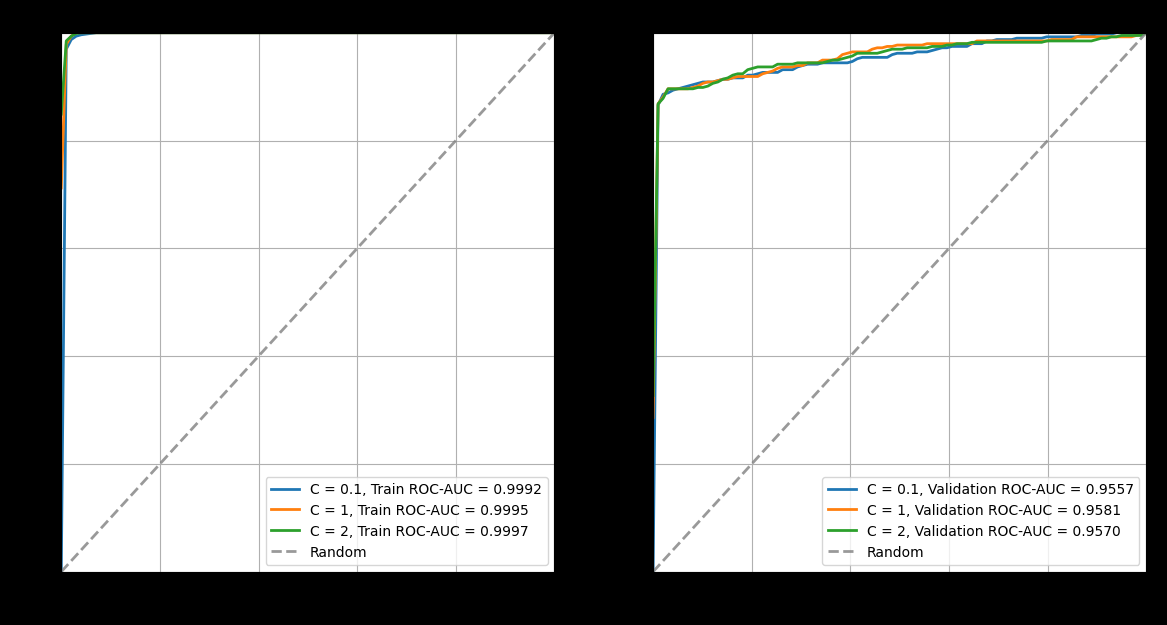

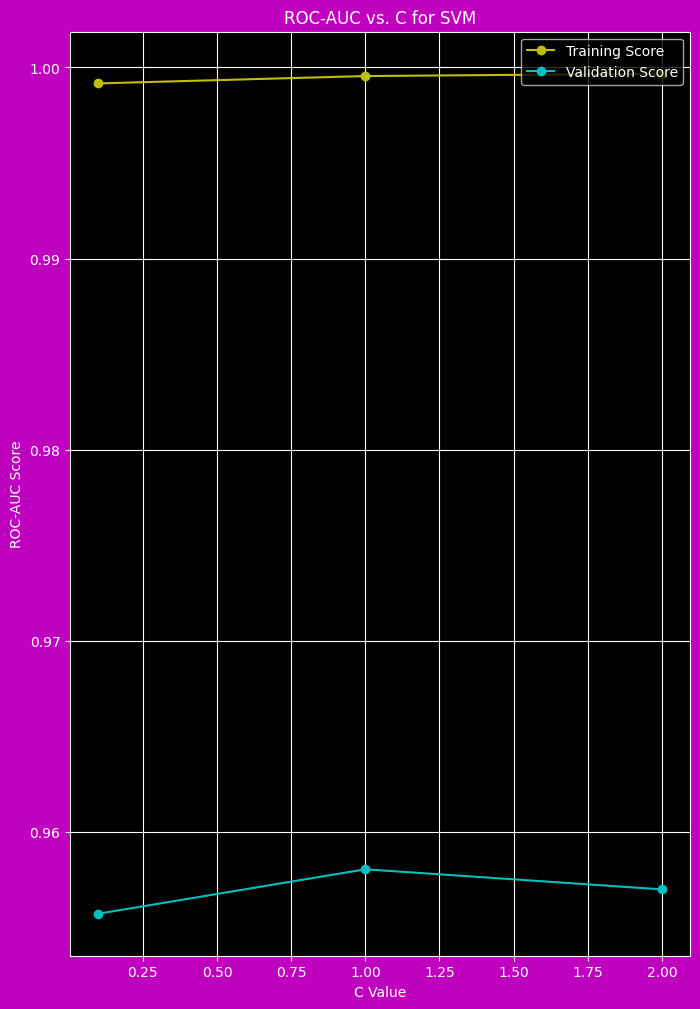

====================================== Final Report ====================================
Train ROC-AUC scores across C values: [0.9991622137279202, 0.9995467697650952, 0.9996688377423705]
Validation ROC-AUC scores across C values: [0.9557427998261878, 0.95806649696548, 0.9570148341035694]
Optimal C Value: 1
Highest ROC-AUC Score (Validation): 0.95806649696548


In [14]:

from sklearn import svm
print("========================================================================================")

print("================================== SVM Classifier Analysis =============================")

# List of potential C values for SVM
potential_C_values = [0.1, 1, 2]

# Lists to capture mean ROC-AUC scores for both training and validation datasets
train_mean_scores = []
validation_mean_scores = []
avg_fpr = np.linspace(0, 1, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), facecolor='black')

# Evaluate SVM for each value of C
for c in potential_C_values:
    print(f"Evaluating for C = {c} using rbf kernel...")
    train_scores = []
    validation_scores = []
    train_tprs = []
    validation_tprs = []

    # Cross-validation loop
    for train_idx, val_idx in skf.split(X_train_pt, y_train_pt):
        start_time = time.time()
        print(f"Training on indices: {train_idx}. Validating on indices: {val_idx}.")
        X_train_subset, X_val_subset = X_train_pt[train_idx], X_train_pt[val_idx]
        y_train_subset, y_val_subset = y_train_pt.iloc[train_idx], y_train_pt.iloc[val_idx]

        svm_instance = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_instance.fit(X_train_subset, y_train_subset)

        y_train_predictions = svm_instance.predict_proba(X_train_subset)
        train_roc_score = roc_auc_score(y_train_subset, y_train_predictions[:, 1])
        train_scores.append(train_roc_score)

        y_val_predictions = svm_instance.predict_proba(X_val_subset)
        validation_roc_score = roc_auc_score(y_val_subset, y_val_predictions[:, 1])
        validation_scores.append(validation_roc_score)

        train_fpr, train_tpr, _ = roc_curve(y_train_subset, y_train_predictions[:, 1])
        train_tprs.append(interp(avg_fpr, train_fpr, train_tpr))
        
        validation_fpr, validation_tpr, _ = roc_curve(y_val_subset, y_val_predictions[:, 1])
        validation_tprs.append(interp(avg_fpr, validation_fpr, validation_tpr))
        
        print(f"Completed in {time.time() - start_time:.2f} seconds.")
    
    # Compute mean scores and append to lists
    train_mean = np.mean(train_scores)
    train_mean_scores.append(train_mean)

    validation_mean = np.mean(validation_scores)
    validation_mean_scores.append(validation_mean)

    print(f"Train ROC-AUC: {train_mean}. Validation ROC-AUC: {validation_mean}.")
    print("--------------------------------------------------------------------------------")

    # Plotting
    ax1.plot(avg_fpr, np.mean(train_tprs, axis=0), '-', lw=2, label=f'C = {c}, Train ROC-AUC = {train_mean:.4f}')
    ax2.plot(avg_fpr, np.mean(validation_tprs, axis=0), '-', lw=2, label=f'C = {c}, Validation ROC-AUC = {validation_mean:.4f}')

print("=============================== SVM Evaluation Finished ===============================")

# Configure plot settings
for ax in [ax1, ax2]:
    ax.plot([0, 1], [0, 1], '--', lw=2, color='gray', label='Random', alpha=0.8)
    ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0], xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    ax.grid(True)

# Titles
ax1.set_title('Training Data ROC Curve', fontsize=14)
ax2.set_title('Validation Data ROC Curve', fontsize=14)

plt.show()

print("========================================================================================")

# Style settings
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')
    plt.plot(potential_C_values, train_mean_scores, 'yo-')
    plt.plot(potential_C_values, validation_mean_scores, 'co-')
    plt.xlabel('C Value')
    plt.ylabel('ROC-AUC Score')
    plt.title('ROC-AUC vs. C for SVM')
    plt.legend(['Training Score', 'Validation Score'], loc='upper right')
    plt.grid()
    plt.show()

print("========================================================================================")
print("====================================== Final Report ====================================")

# Display scores
print(f"Train ROC-AUC scores across C values: {train_mean_scores}")
print(f"Validation ROC-AUC scores across C values: {validation_mean_scores}")

# Display best results
optimal_index = np.argmax(validation_mean_scores)
optimal_c_value = potential_C_values[optimal_index]
optimal_score = validation_mean_scores[optimal_index]

print(f"Optimal C Value: {optimal_c_value}")
print(f"Highest ROC-AUC Score (Validation): {optimal_score}")

print("========================================================================================")


In [16]:
# SVM hyperparameter configurations to test
configurations = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Instantiate the SVM classifier
svc_classifier = svm.SVC()

timestamp_start = time.time()

# Set up GridSearchCV for hyperparameter optimization with stratified cross-validation
optimized_search = GridSearchCV(svc_classifier,
                                param_grid=configurations, 
                                scoring='roc_auc', 
                                cv=skf, 
                                n_jobs=-1, 
                                verbose=1,
                                pre_dispatch=6, 
                                return_train_score=True) 

# Apply the GridSearchCV on the data to find the best hyperparameters
optimized_search.fit(X_train_pt, y_train_pt)

timestamp_end = time.time()
print(f"Completed in {timestamp_end - timestamp_start:.2f} seconds.")

# Display the results
print(f'Optimal ROC AUC score: {optimized_search.best_score_}')
print(f'Optimal parameter set: {optimized_search.best_params_}')


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Completed in 838.53 seconds.
Optimal ROC AUC score: 0.9565173998635063
Optimal parameter set: {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [17]:
# Extract results from the GridSearch
results = optimized_search.cv_results_

# Display average scores for each parameter set
print("Average test scores by configuration:")
for avg_score, setting in zip(results["mean_test_score"], results["params"]):
    print(setting, avg_score)

# Indicate the order of parameter sets by performance
print("\nParameter set rankings:")
for position, setting in enumerate(results["params"], start=1):
    print(position, setting)

# Highlight the variability in test scores for each parameter set
print("\nTest score fluctuations (standard deviation):")
for deviation, setting in zip(results["std_test_score"], results["params"]):
    print(setting, deviation)


Average test scores by configuration:
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.9565173998635063
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.9555807607718613

Parameter set rankings:
1 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
2 {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

Test score fluctuations (standard deviation):
{'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'} 0.012505854322583103
{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.009905889149890136


In [12]:
# Initialize the SMOTE resampler with a given random state
smote = over_sampling.SMOTE(random_state=0)

# Apply the resampling to the training data
X_smote_train_pt, y_smote_train_pt = smote.fit_resample(X_train_pt, y_train_pt)

In [ ]:
from sklearn import svm
print("=================================== BEGIN SVM CLASSIFICATION =======================================")

# Specify different C values for hyperparameter tuning
C_options = [0.1, 1, 2]

# Prepare lists to capture average ROC-AUC scores and false positive rates for validation data
avg_roc_auc_scores_val = []
base_fpr = np.linspace(0, 1, 100)

# Set up a visualization grid
fig, ax2 = plt.subplots(figsize=(10, 5), facecolor='fuchsia') 
ax2.set_facecolor('black')

# Test various C values
for c in C_options:
    print("Testing with C =", c, "using rbf Kernel")
    cv_scores_val = []
    tprs_val = []

    # Run cross-validation for each split
    for train_idx, val_idx in skf.split(X_smote_train_pt, y_smote_train_pt):
        timer_start = time.time()
        
        print("Using Train Indices:", train_idx, "| Validation Indices:", val_idx)
        X_train_fold, X_val_fold = X_smote_train_pt[train_idx], X_smote_train_pt[val_idx]
        y_train_fold, y_val_fold = y_smote_train_pt[train_idx], y_smote_train_pt[val_idx]

        # Create and train SVM model
        svm_model = svm.SVC(kernel='rbf', C=c, probability=True)
        svm_model.fit(X_train_fold, y_train_fold)

        y_val_predictions = svm_model.predict_proba(X_val_fold)
        val_auc = roc_auc_score(y_true=y_val_fold, y_score=y_val_predictions[:, 1])
        cv_scores_val.append(val_auc)

        fpr_val, tpr_val, _ = roc_curve(y_true=y_val_fold, y_score=y_val_predictions[:, 1])
        tprs_val.append(interp(base_fpr, fpr_val, tpr_val))
        tprs_val[-1][0] = 0.0

        timer_end = time.time()
        print("Duration:", timer_end - timer_start, "seconds")

    avg_roc_auc_val = np.mean(cv_scores_val)
    avg_roc_auc_scores_val.append(avg_roc_auc_val)

    print("Average ROC-AUC for Validation Data =", avg_roc_auc_val)
    print("----------------------------------------------------------------------------------")

    # Visualize the ROC curve
    ax2.plot(base_fpr, np.mean(tprs_val, axis=0), '-', lw=2, label=f'C = {c}, Val ROC-AUC = {avg_roc_auc_val:.4f}')

print("================================== SVM PROCEDURE COMPLETE ========================================")

print("----------------------------------------------------------------------------------")
print("============================= Visualizing the ROC AUC Curve =========================")
print("----------------------------------------------------------------------------------")

# Customize ROC curve properties
ax2.plot([0, 1], [0, 1], '--', lw=2, color='gray', label='Random', alpha=0.8)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Validation ROC Curve')
ax2.legend(loc="lower right")
ax2.grid(True)

# Display the plot
plt.show()

print("=================================== END OF VISUALIZATION =========================================")

# Plot the ROC-AUC scores against different C values
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 12), facecolor='m')
    plt.plot(C_options, avg_roc_auc_scores_val, 'co-')
    plt.xlabel('C Value')
    plt.ylabel('ROC-AUC Score')
    plt.title('SVM ROC-AUC by C Value')
    plt.legend(['Validation'], loc='upper right')
    plt.grid(True)

    plt.show()

print("============================ Best Hyperparameters & Scores ====================================")

# Display average ROC-AUC scores for different C values
print("Average ROC-AUC for Validation by C Value: \n", avg_roc_auc_scores_val)

# Identify the best C value
optimal_idx = np.argmax(avg_roc_auc_scores_val)
optimal_c = C_options[optimal_idx]
optimal_roc_auc = avg_roc_auc_scores_val[optimal_idx]

print("Optimal C Value:", optimal_c)
print("Highest Average ROC-AUC on Validation:", optimal_roc_auc)
print("============================================================================================")


=================================== BEGIN SVM CLASSIFICATION =======================================
Testing with C = 0.1 using rbf Kernel
Using Train Indices: [ 75936  75937  75938 ... 454899 454900 454901] | Validation Indices: [     0      1      2 ... 303265 303266 303267]
Duration: 13264.87340760231 seconds
Using Train Indices: [     0      1      2 ... 454899 454900 454901] | Validation Indices: [ 75936  75937  75938 ... 379082 379083 379084]
Duration: 15002.536671876907 seconds
Using Train Indices: [     0      1      2 ... 379082 379083 379084] | Validation Indices: [151894 151895 151896 ... 454899 454900 454901]
Duration: 12556.449352025986 seconds
Average ROC-AUC for Validation Data = 0.9954886719724346
----------------------------------------------------------------------------------
Testing with C = 1 using rbf Kernel
Using Train Indices: [ 75936  75937  75938 ... 454899 454900 454901] | Validation Indices: [     0      1      2 ... 303265 303266 303267]
Duration: 7369.2792

In [ ]:
# Hyperparameters to be tested
hyperparameters = {"C": [0.01, 0.1], 'kernel': ['rbf'], 'gamma': ['auto']}

# Initialize the SVM classifier
svm_model = svm.SVC()

tick = time.time()  # Start the timer

# Setting up GridSearchCV for hyperparameter optimization with stratified cross-validation
grid_search = GridSearchCV(svm_model,
                        param_grid=hyperparameters, 
                        scoring='roc_auc', 
                        cv=skf, 
                        n_jobs=-1,  # Utilizing all CPU cores
                        verbose=1, 
                        return_train_score=True) 

# Begin hyperparameter tuning with the resampled dataset
grid_search.fit(X_smote_train_pt, y_smote_train_pt)

tock = time.time()  # Stop the timer
print("Elapsed time: {:.2f} seconds".format(tock - tick))

# Display the best score based on chosen metric
print('Top ROC AUC score achieved: ', grid_search.best_score_)

# Display the best hyperparameter set
print('Optimal hyperparameters found: ', grid_search.best_params_)


In [ ]:
# Extract the results from the GridSearch
search_results = grid_search.cv_results_

# Display average scores for all hyperparameter sets
print("Average Scores for Each Parameter Set:")
for score, param_set in zip(search_results["mean_test_score"], search_results["params"]):
    print(param_set, score)

# Showcase ranking based on the scores of the hyperparameter combinations
print("\nHyperparameter Set Rankings:")
for position, param_set in enumerate(search_results["params"]):
    print("Rank {}: {}".format(position+1, param_set))

# Highlight score variability for each hyperparameter combination
print("\nScore Variability (Standard Deviation):")
for deviation, param_set in zip(search_results["std_test_score"], search_results["params"]):
    print(param_set, deviation)
